In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

import statsmodels.api as sm
from statsmodels.formula.api import ols

from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import rdMolDescriptors

In [2]:
traindf = pd.read_csv("data/train.csv")
testdf = pd.read_csv("data/holdout.csv")
peptidedf = pd.read_csv("data/peptide.csv")

In [55]:
traininchi = [Chem.MolToInchiKey(Chem.MolFromSmiles(smi)) for smi in traindf.SMILES]
testinchi = [Chem.MolToInchiKey(Chem.MolFromSmiles(smi)) for smi in testdf.SMILES]
peptideinchi = [Chem.MolToInchiKey(Chem.MolFromSmiles(smi)) for smi in peptidedf.SMILES]

In [56]:
# make sure no overlap molecule
print(set(traininchi).intersection(set(testinchi)))
print(set(traininchi).intersection(set(peptideinchi)))

set()
set()


# Model 1

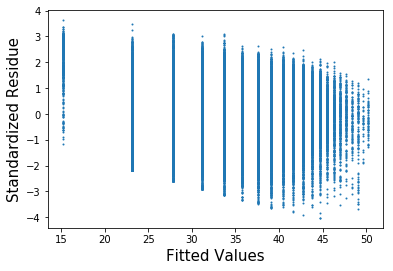

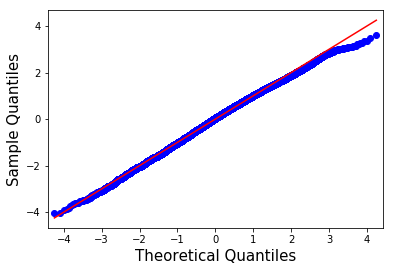

                            OLS Regression Results                            
Dep. Variable:            ConfEntropy   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                 2.817e+04
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:39:32   Log-Likelihood:            -3.5291e+05
No. Observations:               93021   AIC:                         7.058e+05
Df Residuals:                   93019   BIC:                         7.058e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              15.2430    

In [3]:
# Model 1
lm1 = ols('ConfEntropy~np.log1p(NumRotors)', traindf).fit()

# Residue Plot and Q-Q Plot
plt.scatter(lm1.fittedvalues,lm1.resid_pearson,s=1)
plt.xlabel("Fitted Values", size=15)
plt.ylabel("Standardized Residue", size=15)
plt.show()

sm.qqplot(lm1.resid_pearson,line="s")
plt.xlabel("Theoretical Quantiles", size=15)
plt.ylabel("Sample Quantiles", size=15)
plt.show()

print(lm1.summary())

 # Model 2

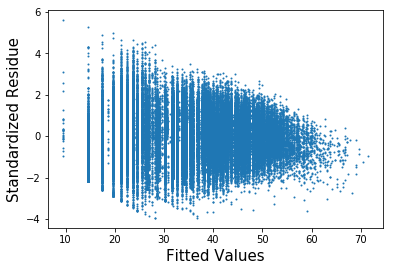

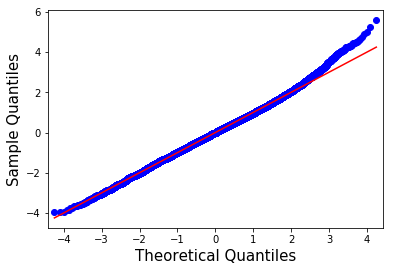

                            OLS Regression Results                            
Dep. Variable:            ConfEntropy   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                 1.061e+05
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:39:33   Log-Likelihood:            -3.0994e+05
No. Observations:               93021   AIC:                         6.199e+05
Df Residuals:                   93018   BIC:                         6.199e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.4922    

In [4]:
# Model 2
lm2 = ols('ConfEntropy~np.log1p(NumRotors)+np.log1p(NumMethyl)', traindf).fit()

# Residue Plot and  Q-Q Plot
plt.scatter(lm2.fittedvalues,lm2.resid_pearson,s=1)
plt.xlabel("Fitted Values", size=15)
plt.ylabel("Standardized Residue", size=15)
plt.show()

sm.qqplot(lm2.resid_pearson,line="s")
plt.xlabel("Theoretical Quantiles", size=15)
plt.ylabel("Sample Quantiles", size=15)
plt.show()

print(lm2.summary())

# Model 3

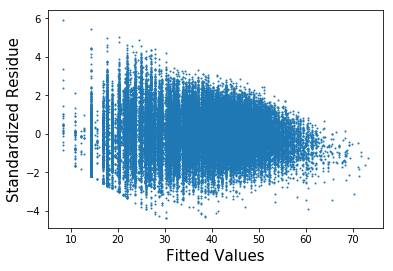

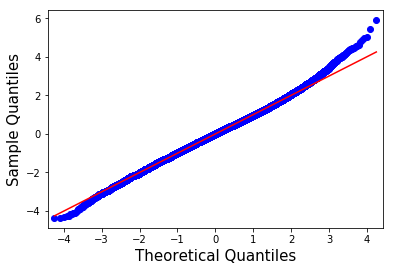

                            OLS Regression Results                            
Dep. Variable:            ConfEntropy   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                 7.598e+04
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:39:34   Log-Likelihood:            -3.0761e+05
No. Observations:               93021   AIC:                         6.152e+05
Df Residuals:                   93017   BIC:                         6.153e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.4022    

In [5]:
# Model 3
lm3 = ols('ConfEntropy~np.log1p(NumRotors)+np.log1p(NumMethyl)+np.log1p(SG)', traindf).fit()

# Residue Plot and  Q-Q Plot
plt.scatter(lm3.fittedvalues,lm3.resid_pearson,s=1)
plt.xlabel("Fitted Values", size=15)
plt.ylabel("Standardized Residue", size=15)
plt.show()

sm.qqplot(lm3.resid_pearson,line="s")
plt.xlabel("Theoretical Quantiles", size=15)
plt.ylabel("Sample Quantiles", size=15)
plt.show()

print(lm3.summary())

# Model 4

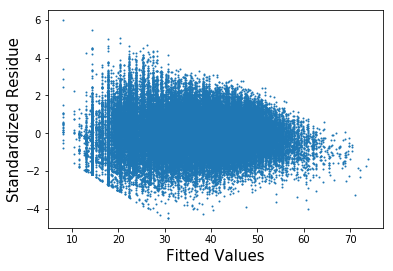

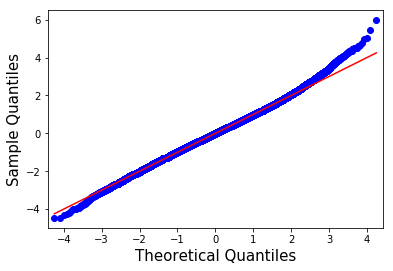

                            OLS Regression Results                            
Dep. Variable:            ConfEntropy   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                 4.642e+04
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:39:37   Log-Likelihood:            -3.0701e+05
No. Observations:               93021   AIC:                         6.140e+05
Df Residuals:                   93015   BIC:                         6.141e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.1389    

In [6]:
# Model 4
lm4 = ols('ConfEntropy~np.log1p(NumRotors)+np.log1p(NumMethyl)+np.log1p(SG)+np.log1p(HBond)+np.log1p(PiStack)'
          , traindf).fit()

# Residue Plot and  Q-Q Plot
plt.scatter(lm4.fittedvalues,lm4.resid_pearson,s=1)
plt.xlabel("Fitted Values", size=15)
plt.ylabel("Standardized Residue", size=15)
plt.show()

sm.qqplot(lm4.resid_pearson,line="s")
plt.xlabel("Theoretical Quantiles", size=15)
plt.ylabel("Sample Quantiles", size=15)
plt.show()

print(lm4.summary())

# Model 5

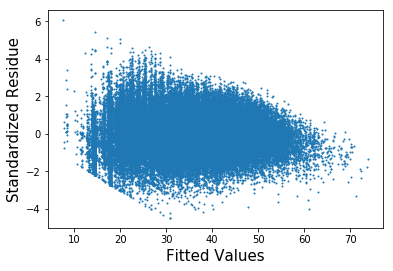

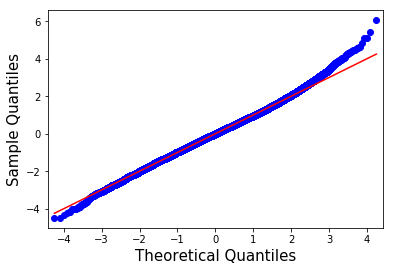

                            OLS Regression Results                            
Dep. Variable:            ConfEntropy   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                 3.874e+04
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:39:38   Log-Likelihood:            -3.0696e+05
No. Observations:               93021   AIC:                         6.139e+05
Df Residuals:                   93014   BIC:                         6.140e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.3595    

In [7]:
# Model 5
lm5 = ols('ConfEntropy~np.log1p(NumRotors)+np.log1p(NumMethyl)+np.log1p(SG)+np.log1p(HBond)+np.log1p(PiStack)+np.log1p(Ring)'
          , traindf).fit()

# Residue Plot and  Q-Q Plot
plt.scatter(lm5.fittedvalues,lm5.resid_pearson,s=1)
plt.xlabel("Fitted Values", size=15)
plt.ylabel("Standardized Residue", size=15)
plt.show()

sm.qqplot(lm5.resid_pearson,line="s")
plt.xlabel("Theoretical Quantiles", size=15)
plt.ylabel("Sample Quantiles", size=15)
plt.show()

print(lm5.summary())

In [8]:
def FPBase64ToNumpy(fps):
    X = []
    for item in fps:
        bv = DataStructs.ExplicitBitVect(4096)
        DataStructs.ExplicitBitVect.FromBase64(bv, item)
        arr = np.zeros( (1,) )
        DataStructs.ConvertToNumpyArray( bv, arr )
        X.append(arr)
    return X

# LASSO and Ridge Regression
trainX = FPBase64ToNumpy(traindf.ECFP6)
trainY = traindf.ConfEntropy
testX =FPBase64ToNumpy(testdf.ECFP6)
testY = testdf.ConfEntropy
peptideX = FPBase64ToNumpy(peptidedf.ECFP6)
peptideY = peptidedf.ConfEntropy
 
Lasso = LassoCV(cv=3,alphas=(0.01, 0.05, 0.1,0.5, 1.0, 5.0, 10.0)).fit(trainX, trainY) 
Ridge = RidgeCV(scoring='neg_mean_absolute_error',cv=3,alphas=(0.01, 0.05, 0.1,0.5, 1.0, 5.0, 10.0)).fit(trainX, trainY)


# Performance on Holdout Test Set and Peptides Test Set

In [30]:
# Training set
print("Model 1 MAE (Trianing set): %.3f" %(mean_absolute_error(traindf["ConfEntropy"],lm1.predict(traindf))))
print("Model 2 MAE (Trianing set): %.3f" %(mean_absolute_error(traindf["ConfEntropy"],lm2.predict(traindf))))
print("Model 3 MAE (Trianing set): %.3f" %(mean_absolute_error(traindf["ConfEntropy"],lm3.predict(traindf))))
print("Model 4 MAE (Training set): %.3f" %(mean_absolute_error(traindf["ConfEntropy"],lm4.predict(traindf))))
print("Model 5 MAE (Training set): %.3f" %(mean_absolute_error(traindf["ConfEntropy"],lm5.predict(traindf))))
print("LASSO MAE (Training set): %.3f" %(mean_absolute_error(traindf["ConfEntropy"],Lasso.predict(trainX))))
print("Ridge MAE (Training set): %.3f" %(mean_absolute_error(traindf["ConfEntropy"],Ridge.predict(trainX))))

Model 1 MAE (Trianing set): 8.665
Model 2 MAE (Trianing set): 5.337
Model 3 MAE (Trianing set): 5.193
Model 4 MAE (Training set): 5.159
Model 5 MAE (Training set): 5.155
LASSO MAE (Training set): 5.550
Ridge MAE (Training set): 4.949


In [32]:
# Holdout test set
print("Model 1 MAE (holdout test-set): %.3f" %(mean_absolute_error(testdf["ConfEntropy"],lm1.predict(testdf))))
print("Model 2 MAE (holdout test-set): %.3f" %(mean_absolute_error(testdf["ConfEntropy"],lm2.predict(testdf))))
print("Model 3 MAE (holdout test-set): %.3f" %(mean_absolute_error(testdf["ConfEntropy"],lm3.predict(testdf))))
print("Model 4 MAE (holdout test-set): %.3f" %(mean_absolute_error(testdf["ConfEntropy"],lm4.predict(testdf))))
print("Model 5 MAE (holdout test-set): %.3f" %(mean_absolute_error(testdf["ConfEntropy"],lm5.predict(testdf))))
print("LASSO MAE (holdout test-set): %.3f" %(mean_absolute_error(testdf["ConfEntropy"],Lasso.predict(testX))))
print("Ridge MAE (holdout test-set): %.3f" %(mean_absolute_error(testdf["ConfEntropy"],Ridge.predict(testX))))

Model 1 MAE (holdout test-set): 8.832
Model 2 MAE (holdout test-set): 4.887
Model 3 MAE (holdout test-set): 4.793
Model 4 MAE (holdout test-set): 4.758
Model 5 MAE (holdout test-set): 4.767
LASSO MAE (holdout test-set): 5.472
Ridge MAE (holdout test-set): 5.291


In [33]:
# Peptides test set
print("Model 1 MAE (peptides test-set): %.3f" %(mean_absolute_error(peptidedf["ConfEntropy"],lm1.predict(peptidedf))))
print("Model 2 MAE (peptides test-set): %.3f" %(mean_absolute_error(peptidedf["ConfEntropy"],lm2.predict(peptidedf))))
print("Model 3 MAE (peptides test-set): %.3f" %(mean_absolute_error(peptidedf["ConfEntropy"],lm3.predict(peptidedf))))
print("Model 4 MAE (peptides test-set): %.3f" %(mean_absolute_error(peptidedf["ConfEntropy"],lm4.predict(peptidedf))))
print("Model 5 MAE (peptides test-set): %.3f" %(mean_absolute_error(peptidedf["ConfEntropy"],lm5.predict(peptidedf))))
print("LASSO MAE (peptides test-set): %.3f" %(mean_absolute_error(peptidedf["ConfEntropy"],Lasso.predict(peptideX))))
print("Ridge MAE (peptides test-set): %.3f" %(mean_absolute_error(peptidedf["ConfEntropy"],Ridge.predict(peptideX))))

Model 1 MAE (peptides test-set): 9.004
Model 2 MAE (peptides test-set): 4.623
Model 3 MAE (peptides test-set): 5.049
Model 4 MAE (peptides test-set): 4.704
Model 5 MAE (peptides test-set): 4.654
LASSO MAE (peptides test-set): 6.764
Ridge MAE (peptides test-set): 5.826
